# Networks

Networks are another important data structure in transportaiton.  Think roadway networks in particular, but many things can be represented as a network.  We'll go over a few basics in class. 

MPOs or DOTs with a travel model will maintain a network representation of the street network for use in the model.  This will have the attributes the model needs: free flow speed, capacity, length, directionality, turn restrictions, facility type, etc.  Usually, the best way to get a copy is to call up your friendly local transportation modeler and ask.  Even in this tech-crazy world, it is amazing how far asking politely will get you...

...however, that's not what we're going to do here.  Instead, we are going to work with network data from OpenStreetMap: 

http://www.openstreetmap.org/

To make it easier, we will work with a package called OSMnx, by Geoff Boeing. You can read a paper on the toolkit here: 

https://www.researchgate.net/publication/309738462_OSMNX_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks

And a blog post here: 

http://geoffboeing.com/2016/11/osmnx-python-street-networks/


### Homework

Your homework is to: 

1. Read the network paper linked above. 

2. Use the blog post to figure out how to install and use the package. 

3. Get the street network for Lexington.  

4. Print the basic_stats for the network. 

5. Calculate and show the shortest path from your home (or another point of interest) to UK campus.  Is this the route you would take?  What is the same or different?

6. Repeat step 5 for three other trips that you make regularly.  

 

In [2]:
#installing the packages
import osmnx as ox
import rtree
import geopandas
import networkx as nx
import matplotlib
import math as m
from haversine import haversine

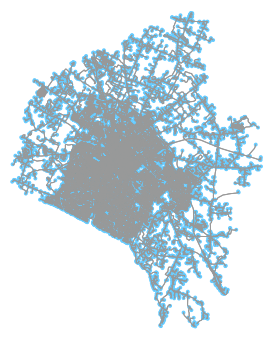

(<Figure size 435.163x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbadf63fc8>)

In [2]:
#Street Network of Lexington
Lex = ox.graph_from_place('Fayette County, Kentucky, USA')
ox.plot_graph(Lex)

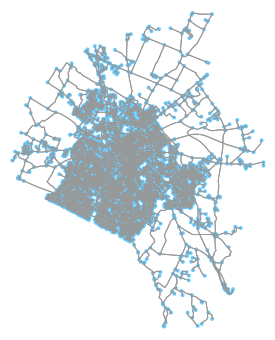

(<Figure size 439.495x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbaf734b08>)

In [3]:
#Street Network of Lexington - Driving
LexD = ox.graph_from_place('Fayette County, Kentucky, USA', network_type='drive')
ox.plot_graph(LexD)

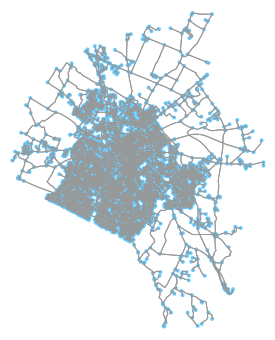

(<Figure size 439.495x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbb05bfd48>)

In [4]:
#Street Network of Lexington - Walking
LexW = ox.graph_from_place('Fayette County, Kentucky, USA', network_type='walk')
ox.plot_graph(LexD)

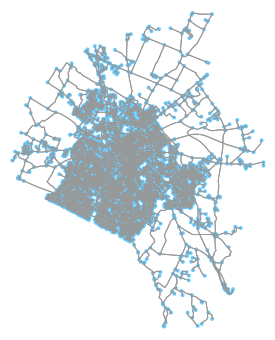

(<Figure size 439.495x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbc73f0248>)

In [5]:
#Street Network of Lexington - Biking
LexW = ox.graph_from_place('Fayette County, Kentucky, USA', network_type='bike')
ox.plot_graph(LexD)

In [6]:
basic_stats = ox.basic_stats(Lex)
print(basic_stats)

{'n': 36794, 'm': 99471, 'k_avg': 5.406914170788715, 'intersection_count': 30061, 'streets_per_node_avg': 2.8425286731532315, 'streets_per_node_counts': {0: 0, 1: 6733, 2: 161, 3: 22227, 4: 7527, 5: 134, 6: 10, 7: 2}, 'streets_per_node_proportion': {0: 0.0, 1: 0.18299179214002284, 2: 0.004375713431537751, 3: 0.604093058650867, 4: 0.20457139751046366, 5: 0.0036418981355655815, 6: 0.00027178344295265535, 7: 5.4356688590531064e-05}, 'edge_length_total': 9021628.874999946, 'edge_length_avg': 90.69607096540646, 'street_length_total': 4908833.7830000315, 'street_length_avg': 93.05316821792185, 'street_segments_count': 52753, 'node_density_km': None, 'intersection_density_km': None, 'edge_density_km': None, 'street_density_km': None, 'circuity_avg': 1.1239143828928575, 'self_loop_proportion': 0.010656372208985533, 'clean_intersection_count': None, 'clean_intersection_density_km': None}


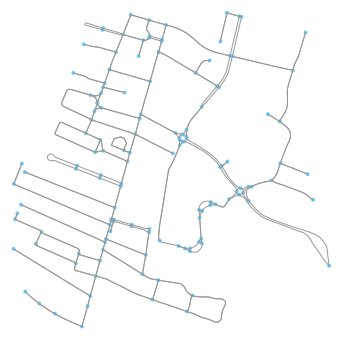

(<Figure size 551.788x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbb08353c8>)

In [10]:
Home = ox.graph_from_address('1608 University Ct., Fayette County,Kentucky, USA', network_type='drive')
ox.plot_graph(Home)

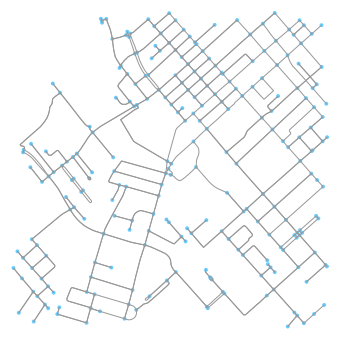

(<Figure size 548.591x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbb0ad0748>)

In [11]:
Work = ox.graph_from_address('351 Administration Dr, Fayette County,Kentucky, USA', network_type='drive')
ox.plot_graph(Work)

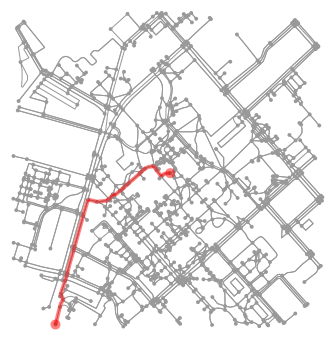

(<Figure size 540.481x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbb075bc88>)

In [62]:
#G = ox.graph_from_address('Fayette County, Kentucky, USA', distance=800, network_type='drive')
#https://github.com/gboeing/osmnx/issues/221

Home_CR = (38.037947, -84.504569)
Work_CR = (38.017454, -84.511002)

dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

G = ox.graph_from_point(Home_CR, simplify=True, distance=500)

Home_Node = ox.get_nearest_node(G, Home_CR, method='euclidean') #eucilidean cause projected coordinates
Work_Node = ox.get_nearest_node(G, Work_CR, method='euclidean')

route = nx.shortest_path(G, source=Home_Node, target=Work_Node, weight='length')

ox.plot_graph_route(G, route)

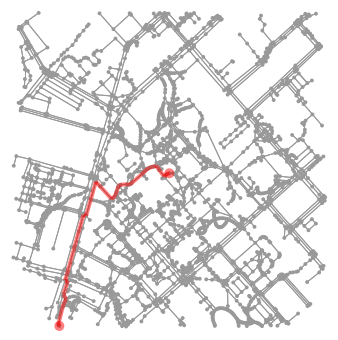

(<Figure size 545.21x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbabb86108>)

In [63]:
Home_CR = (38.037947, -84.504569)
Work_CR = (38.017454, -84.511002)

#dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

R = ox.graph_from_point(Home_CR, simplify=False, distance=500, network_type='walk')

Home_Node = ox.get_nearest_node(R, Home_CR, method='euclidean') 
Work_Node = ox.get_nearest_node(R, Work_CR, method='euclidean')

route = nx.shortest_path(R, Home_Node, Work_Node)
ox.plot_graph_route(R, route)

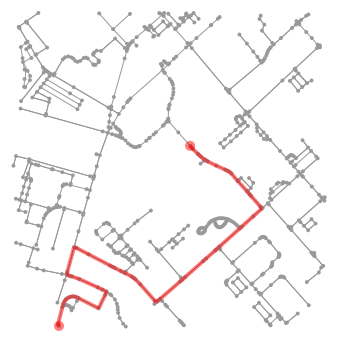

(<Figure size 544.629x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbaa52d7c8>)

In [64]:
Home_CR = (38.037947, -84.504569)
Work_CR = (38.017454, -84.511002)

#dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

S = ox.graph_from_point(Home_CR, simplify=False, distance=500, network_type='bike')

Home_Node = ox.get_nearest_node(S, Home_CR, method='euclidean') 
Work_Node = ox.get_nearest_node(S, Work_CR, method='euclidean')

route = nx.shortest_path(S, Home_Node, Work_Node)
ox.plot_graph_route(S, route)

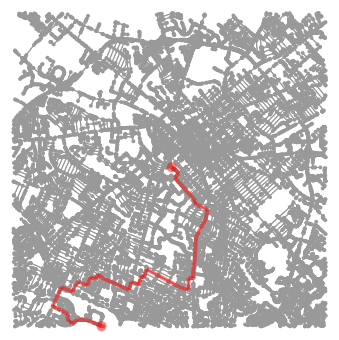

(<Figure size 546.211x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dbbc68ed48>)

In [72]:
#Home to Walmart

Home_CR = (38.037947, -84.504569)
Walmart_CR = (37.979587, -84.531072)

#dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

T = ox.graph_from_point(Home_CR, simplify=False,  distance=5000,network_type='drive')

Home_Node = ox.get_nearest_node(T, Home_CR, method='euclidean') 
Walmart_Node = ox.get_nearest_node(T, Walmart_CR, method='euclidean')

route = nx.shortest_path(T, Home_Node, Walmart_Node)
ox.plot_graph_route(T, route)

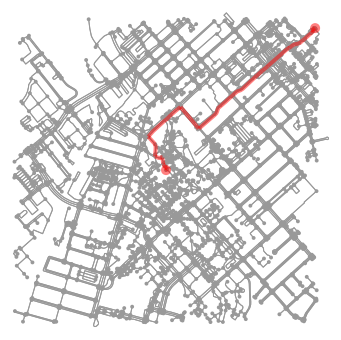

(<Figure size 550.848x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1dba9a5b4c8>)

In [77]:
#Work to Coffeeshop (third street stuff)

Work_CR = (38.037682, -84.504859)
CShop_CR = (38.049605, -84.4929202)

#dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

N = ox.graph_from_point(Work_CR,network_type='walk')

Work_Node = ox.get_nearest_node(N, Work_CR, method='euclidean') 
CShop_Node = ox.get_nearest_node(N, CShop_CR, method='euclidean')

route = nx.shortest_path(N, Work_Node, CShop_Node)
ox.plot_graph_route(N, route)

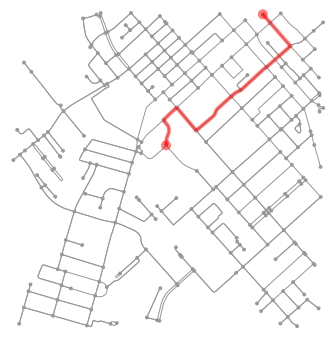

(<Figure size 541.801x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2311c39fb48>)

In [3]:
#Home to Nightclub (XoXo)
Home_CR = (38.037947, -84.504569)
Club_CR = (38.049543, -84.498753)

#dist_fl = (int(haversine(Home_CR, Work_CR)*1000))*2

P = ox.graph_from_point(Home_CR, network_type='drive')

Home_Node = ox.get_nearest_node(P, Home_CR, method='euclidean') 
Club_Node = ox.get_nearest_node(P, Club_CR, method='euclidean')

route = nx.shortest_path(P, Home_Node, Club_Node)
ox.plot_graph_route(P, route)